In [26]:
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_csv('..\\data\\employee_churn_dataset.csv')

In [28]:
df.isna().sum().sum()

np.int64(0)

In [29]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Education Level', 'Marital Status',
       'Tenure', 'Job Role', 'Department', 'Salary', 'Work Location',
       'Performance Rating', 'Projects Completed', 'Training Hours',
       'Promotions', 'Overtime Hours', 'Satisfaction Level',
       'Work-Life Balance', 'Average Monthly Hours Worked', 'Absenteeism',
       'Distance from Home', 'Manager Feedback Score', 'Churn'],
      dtype='object')

<Axes: >

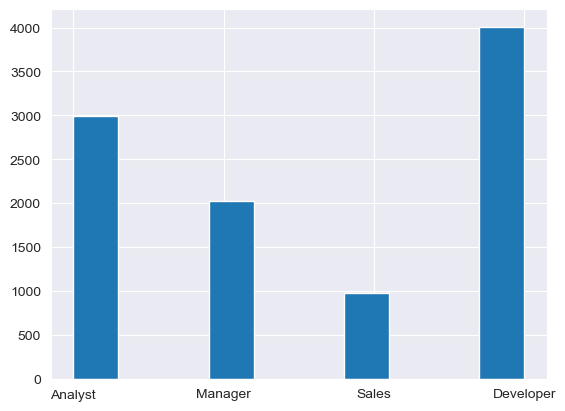

In [30]:
df['Job Role'].hist(bins=10)

<Axes: xlabel='Churn', ylabel='Tenure'>

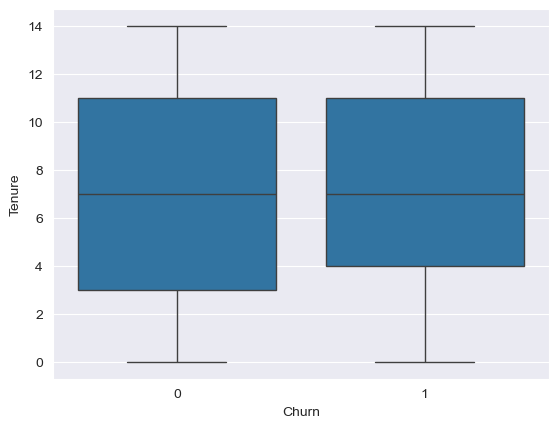

In [31]:
sns.boxplot(x='Churn', y=df.columns[5], data=df)

With this basic EDA with have:
- no missing data
- data is very balanced comparing to label Churn
- no outliers

In [32]:
for column in df.drop('Employee ID',axis=1).columns:
    try:
        df[column] + 1
    except:
        dummies = pd.get_dummies(df[column]).add_prefix(column+'_')
        df[dummies.columns] = dummies
        df.drop(column, axis=1, inplace=True)

In [33]:
df.columns

Index(['Employee ID', 'Age', 'Tenure', 'Salary', 'Performance Rating',
       'Projects Completed', 'Training Hours', 'Promotions', 'Overtime Hours',
       'Satisfaction Level', 'Average Monthly Hours Worked', 'Absenteeism',
       'Distance from Home', 'Manager Feedback Score', 'Churn',
       'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Job Role_Analyst', 'Job Role_Developer',
       'Job Role_Manager', 'Job Role_Sales', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Work Location_Hybrid',
       'Work Location_On-site', 'Work Location_Remote',
       'Work-Life Balance_Average', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor'],
      dtype='object')

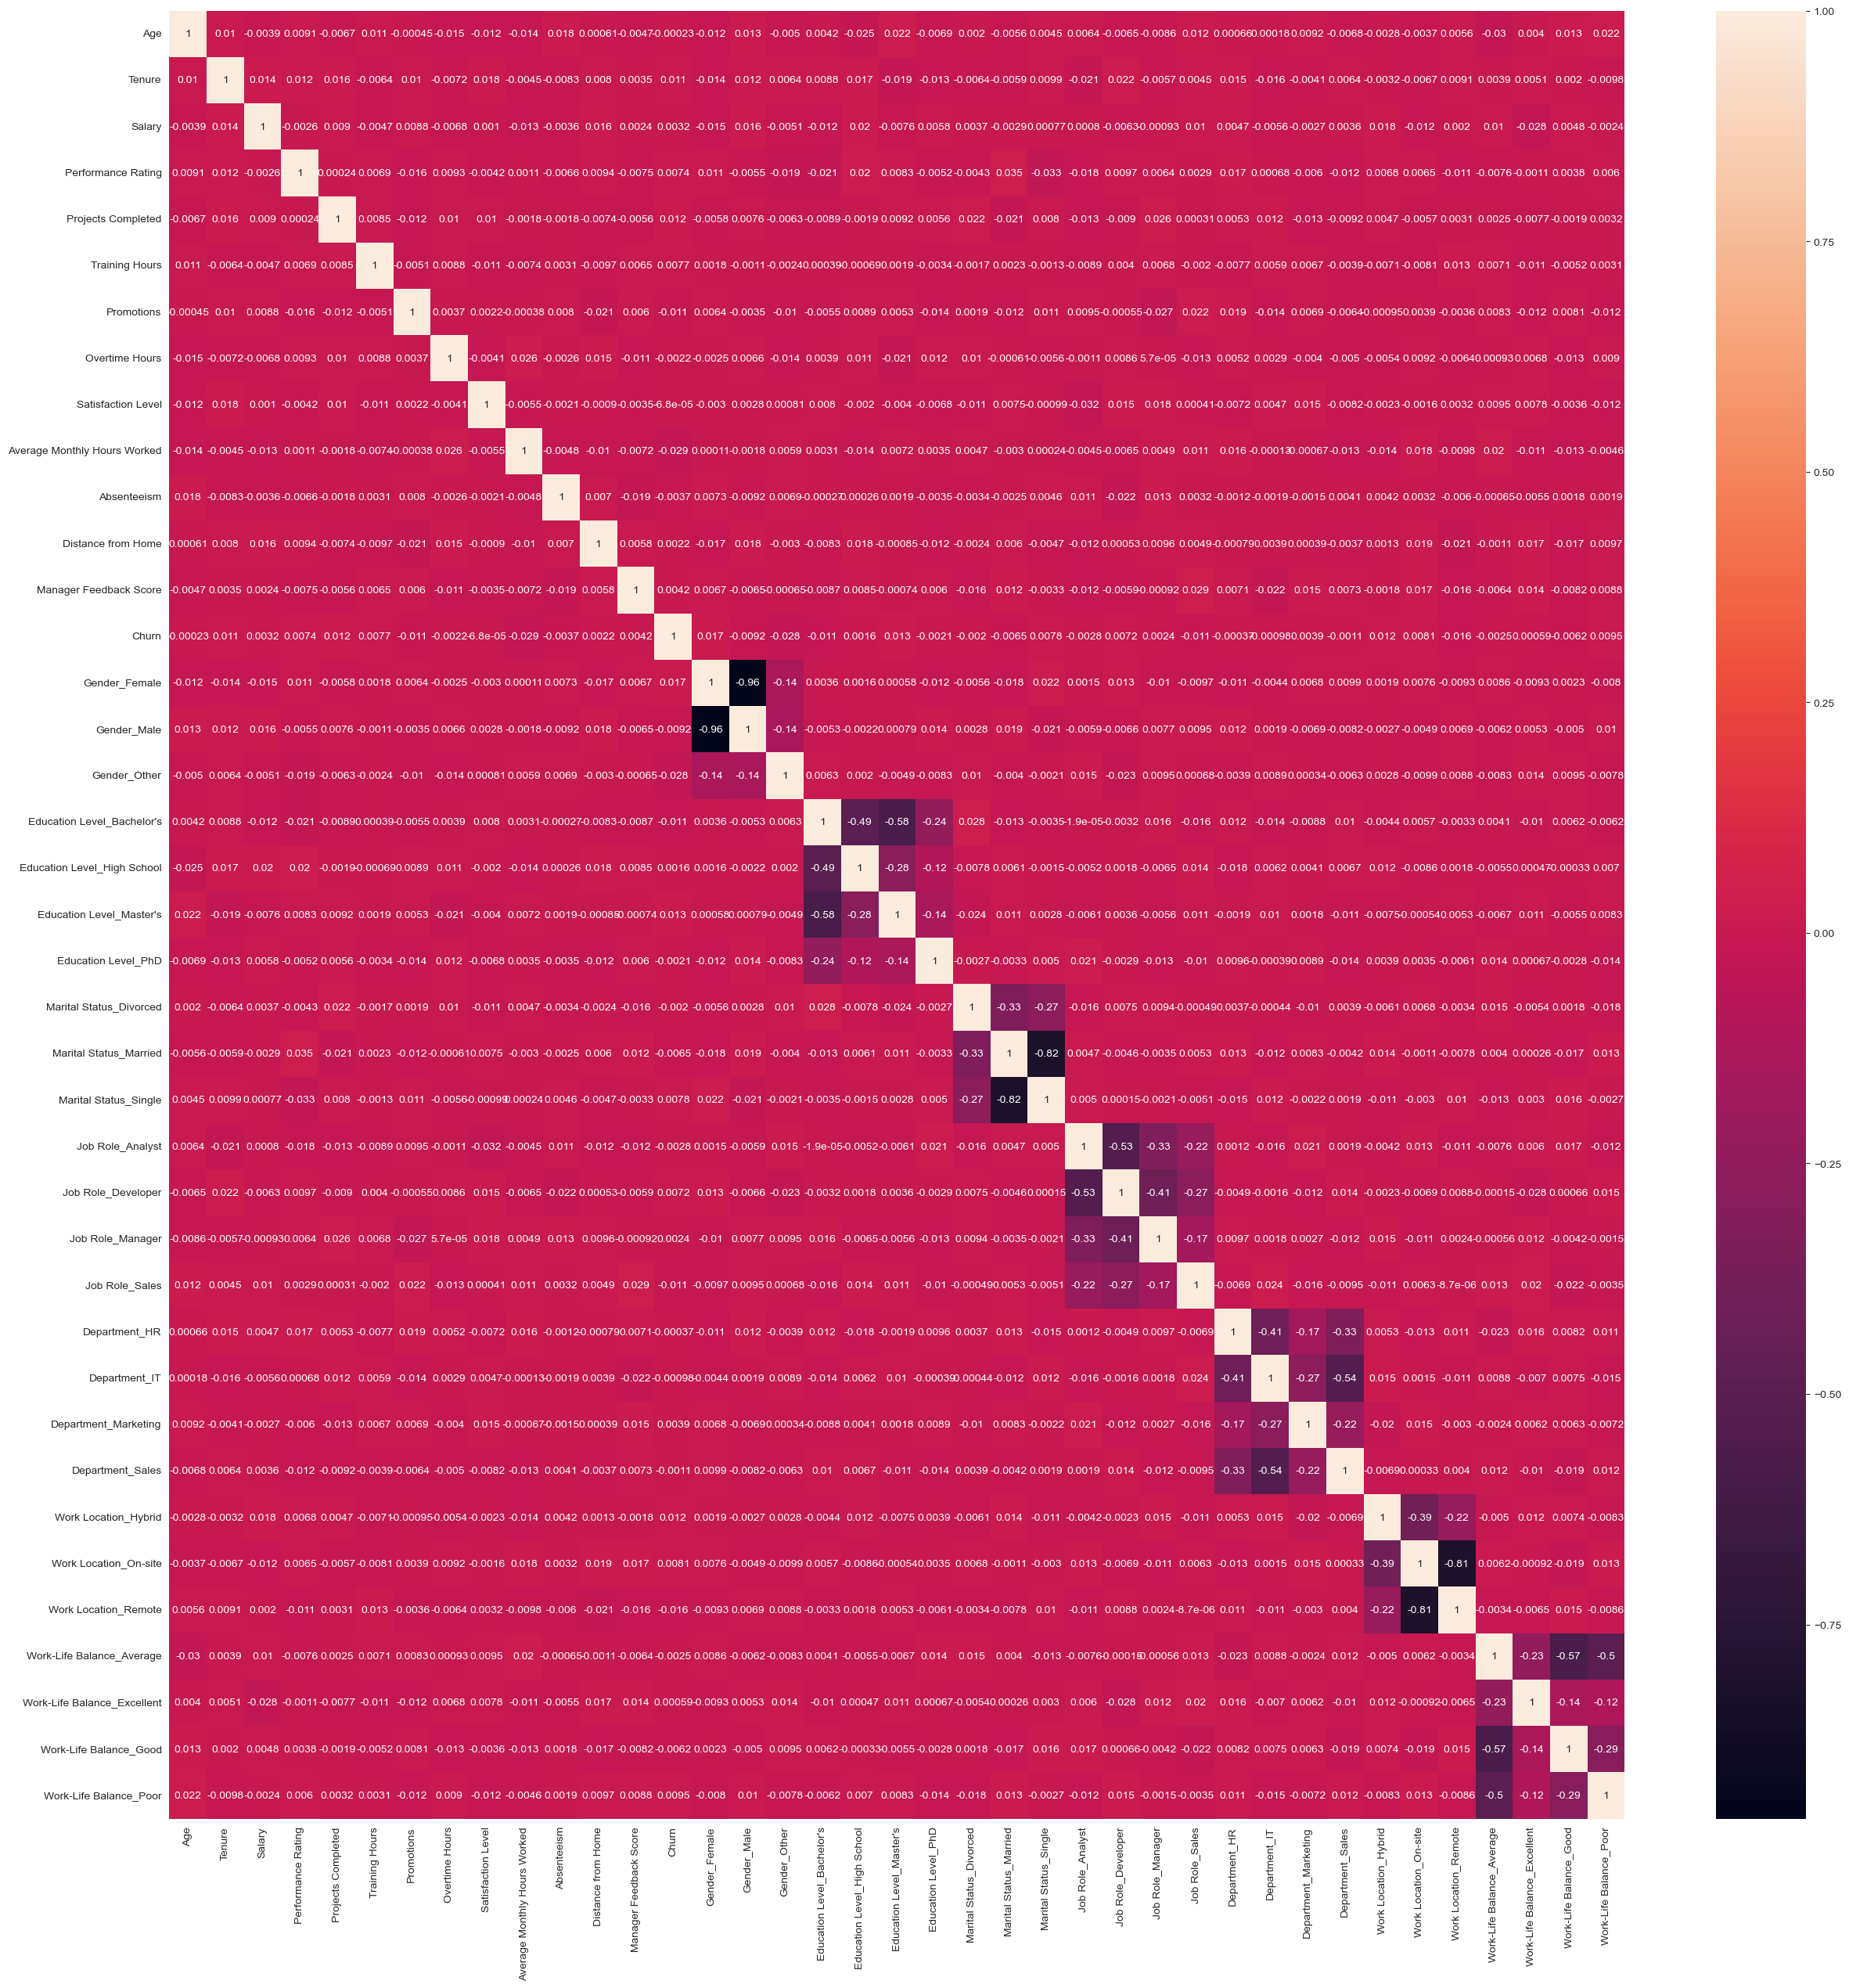

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(df.drop('Employee ID',axis=1).corr(), annot=True)
plt.show()